# US Accidents Exploratory Data Analysis

*italicized text*## Download Data

The data is a countrywide accident dataset, with data from Feb 2016 to the end of Dec 2021.  The file can be downloaded
at this link:https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents

In [1]:
pip install opendatasets --quiet

In [3]:
import opendatasets as od

download_url = "https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents"

od.download(download_url)
# key: 788efbdb51c3178db7bbd6e6e06a3695

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: jeanrobert70
Your Kaggle Key: ··········


100%|██████████| 269M/269M [00:01<00:00, 146MB/s]


## Data Preparation & Cleaning

1. Load file using Pandas
2. Explore information about the data
3. Clean the data (Missing or Incorrect values)

**Load Data**

In [7]:
import pandas as pd
data = pd.read_csv("/content/us-accidents/US_Accidents_Dec21_updated.csv")
data.head()

ID  Severity           Start_Time             End_Time  Start_Lat  \
0  A-1         3  2016-02-08 00:37:08  2016-02-08 06:37:08  40.108910   
1  A-2         2  2016-02-08 05:56:20  2016-02-08 11:56:20  39.865420   
2  A-3         2  2016-02-08 06:15:39  2016-02-08 12:15:39  39.102660   
3  A-4         2  2016-02-08 06:51:45  2016-02-08 12:51:45  41.062130   
4  A-5         3  2016-02-08 07:53:43  2016-02-08 13:53:43  39.172393   

   Start_Lng    End_Lat    End_Lng  Distance(mi)  \
0 -83.092860  40.112060 -83.031870         3.230   
1 -84.062800  39.865010 -84.048730         0.747   
2 -84.524680  39.102090 -84.523960         0.055   
3 -81.537840  41.062170 -81.535470         0.123   
4 -84.492792  39.170476 -84.501798         0.500   

                                         Description  ...  Roundabout Station  \
0  Between Sawmill Rd/Exit 20 and OH-315/Olentang...  ...       False   False   
1                 At OH-4/OH-235/Exit 41 - Accident.  ...       False   False   
2                   At I-71/US-50/Exit 1 - Accident.  ...       False   False   
3                    At Dart Ave/Exit 21 - Accident.  ...       False   False   
4                 At Mitchell Ave/Exit 6 - Accident.  ...       False   False   

    Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0  False           False          False        False          Night   
1  False           False          False        False          Night   
2  False           False          False        False          Night   
3  False           False          False        False          Night   
4  False           False          False        False            Day   

  Civil_Twilight Nautical_Twilight Astronomical_Twilight  
0          Night             Night                 Night  
1          Night             Night                 Night  
2          Night             Night                   Day  
3          Night               Day                   Day  
4            Day               Day                   Day  

[5 rows x 47 columns]

**Data Exploration**
  * Column we are exploring:
    1. Start_Time
    2. City
    3. State
    4. Temperature
    5. Start_Lat & Start_Lng 

In [5]:
# View info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [ ]:
# Statistics of data
round(data.describe(), 2)

Severity   Start_Lat   Start_Lng     End_Lat     End_Lng  \
count  2845342.00  2845342.00  2845342.00  2845342.00  2845342.00   
mean         2.14       36.25      -97.11       36.25      -97.11   
std          0.48        5.36       18.32        5.36       18.32   
min          1.00       24.57     -124.55       24.57     -124.55   
25%          2.00       33.45     -118.03       33.45     -118.03   
50%          2.00       36.10      -92.42       36.10      -92.42   
75%          2.00       40.16      -80.37       40.16      -80.37   
max          4.00       49.00      -67.11       49.08      -67.11   

       Distance(mi)      Number  Temperature(F)  Wind_Chill(F)  Humidity(%)  \
count    2845342.00  1101431.00      2776068.00     2375699.00   2772250.00   
mean           0.70     8089.41           61.79          59.66        64.37   
std            1.56    18360.09           18.62          21.16        22.87   
min            0.00        0.00          -89.00         -89.00         1.00   
25%            0.05     1270.00           50.00          46.00        48.00   
50%            0.24     4007.00           64.00          63.00        67.00   
75%            0.76     9567.00           76.00          76.00        83.00   
max          155.19  9999997.00          196.00         196.00       100.00   

       Pressure(in)  Visibility(mi)  Wind_Speed(mph)  Precipitation(in)  
count    2786142.00      2774796.00       2687398.00         2295884.00  
mean          29.47            9.10             7.40               0.01  
std            1.05            2.72             5.53               0.09  
min            0.00            0.00             0.00               0.00  
25%           29.31           10.00             3.50               0.00  
50%           29.82           10.00             7.00               0.00  
75%           30.01           10.00            10.00               0.00  
max           58.90          140.00          1087.00              24.00

In [10]:
# View missing values
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

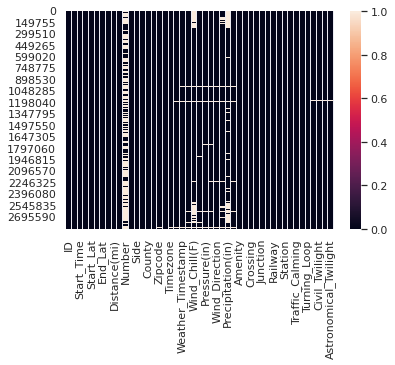

In [ ]:
sns.heatmap(data.isnull())

The 'Number' column has the most missing values. This variable Shows the street number in address field.

In [8]:
# View percentage of missing values
miss_values = round(data.isnull().sum()/ len(data.isnull()), 2).sort_values(ascending=False) 
miss_values[miss_values > 0]

Number               0.61
Precipitation(in)    0.19
Wind_Chill(F)        0.17
Wind_Speed(mph)      0.06
Humidity(%)          0.03
Wind_Direction       0.03
Visibility(mi)       0.02
Pressure(in)         0.02
Temperature(F)       0.02
Weather_Timestamp    0.02
Weather_Condition    0.02
dtype: float64

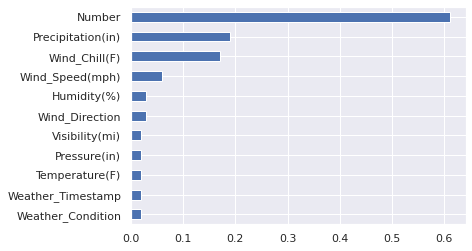

In [11]:
miss_values[miss_values > 0].plot(kind="barh")
plt.gca().invert_yaxis()

In [12]:
 df = data.copy()

In [13]:
len(df)

2845342

In [14]:
df= df.dropna()

In [ ]:
len(df)

943318


## Explorartory Analysis and Visualization

## City

In [ ]:
# View number of cities
df["City"].nunique()

8504

In [ ]:
# View number of Accidents by City
city_accidents = df.groupby("City")["ID"].count().sort_values(ascending=False)
city_accidents

City
Miami          67276
Orlando        37644
Los Angeles    20194
Houston        18923
Charlotte      16044
               ...  
Eldorado           1
Elida              1
Elk Mound          1
Samson             1
Lithopolis         1
Name: ID, Length: 8504, dtype: int64

In [ ]:
#View top 10 city with traffic accidents
city_accidents.head(10)

City
Miami          67276
Orlando        37644
Los Angeles    20194
Houston        18923
Charlotte      16044
Raleigh        15207
Dallas         14199
Baton Rouge    10619
Austin         10590
Tucson          9292
Name: ID, dtype: int64

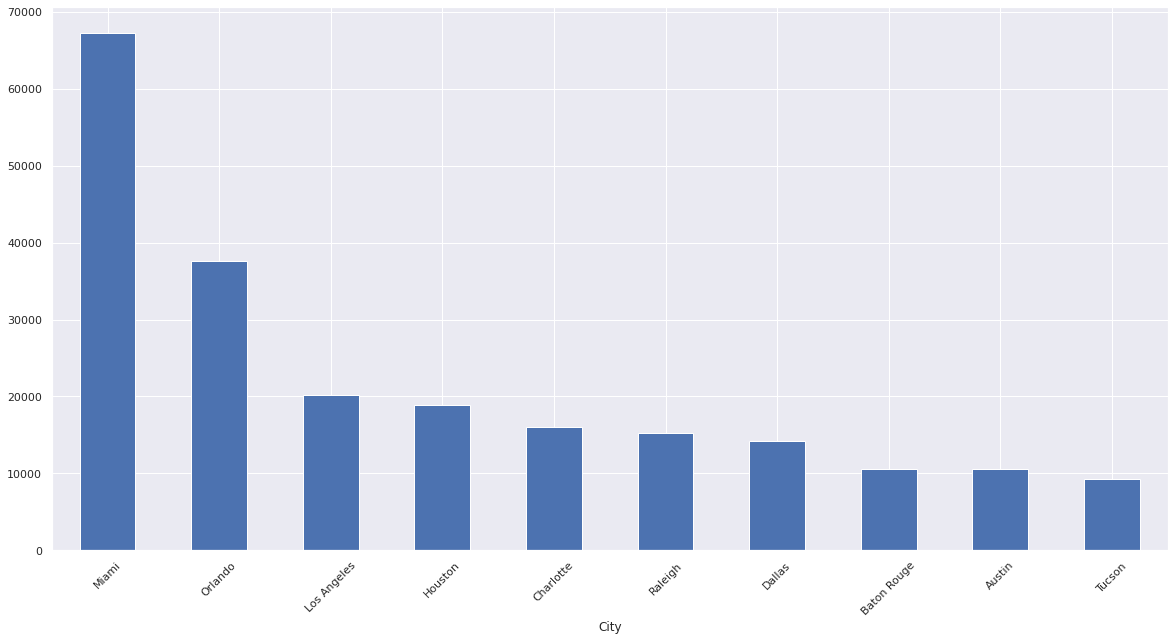

In [ ]:
plt.figure(figsize=(20,10))
city_accidents.head(10).plot(kind="bar")
plt.xticks(rotation=45)
plt.show()

## State

In [ ]:
# View frequency of Accidents by States
states_accidents = df["State"].value_counts()

In [ ]:
high_accident_states = states_accidents[states_accidents >= 100000]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


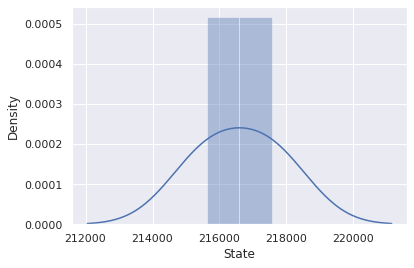

In [ ]:
sns.distplot(high_accident_states)

In [ ]:
# View percentage of Accidents in Florida and California
len(df[(df["State"]=="FL")|(df["State"]=="CA")])/len(df)

0.4592247789186679

In [ ]:
lower_accident_states = states_accidents[states_accidents <= 100000]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


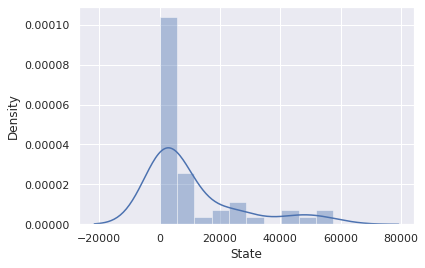

In [ ]:
sns.distplot(lower_accident_states)

## Date of Accident

In [ ]:
# View what time of day most accidents occur
df["Start_Time"] = pd.to_datetime(df["Start_Time"])

In [ ]:
df["Start_Time"].head()

42   2016-02-09 18:20:58
43   2016-02-09 18:20:58
47   2016-02-10 06:18:49
50   2016-02-10 08:35:27
66   2016-02-10 12:54:39
Name: Start_Time, dtype: datetime64[ns]

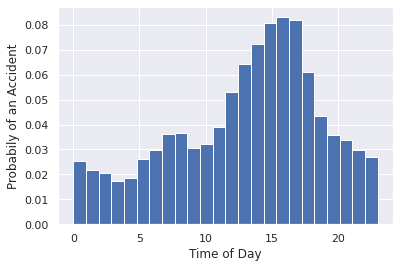

In [ ]:
import numpy as np
df["Start_Time"].dt.hour.hist(bins=24, weights=np.ones(len(df)) / len(df))
plt.xlabel("Time of Day")
plt.ylabel("Probabily of an Accident")
plt.show()

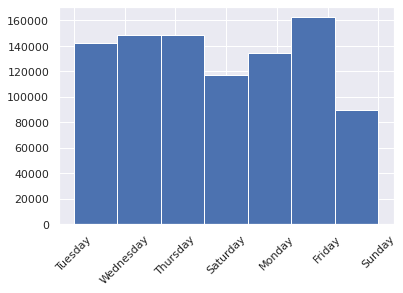

In [ ]:
# Which day of week has the most Accidents
day_of_week = df["Start_Time"].dt.day_name()
day_of_week.hist(bins=7)
plt.xticks(rotation= 45)
plt.show()

In [ ]:
# View distribution of time of accident on weekends

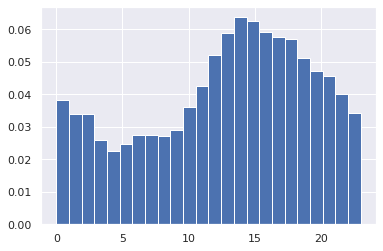

In [ ]:
weekend_df = df[(day_of_week=="Sunday")|(day_of_week=="Saturday")]
weekend_df["Start_Time"].dt.hour.hist(bins=24, weights=np.ones(len(weekend_df)) / len(weekend_df))

In [ ]:
# View frequency of Accidents throughout the year


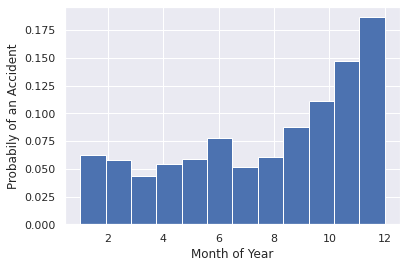

In [ ]:
import numpy as np
df["Start_Time"].dt.month.hist(bins=12, weights=np.ones(len(df)) / len(df))
plt.xlabel("Month of Year")
plt.ylabel("Probabily of an Accident")
plt.show()

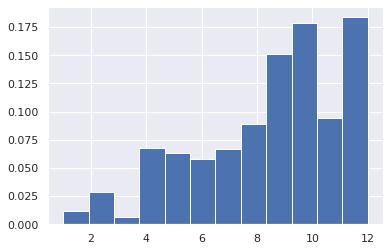

In [ ]:
# Lets view accident per month for 2019
df_2019 = df[df["Start_Time"].dt.year==2019]
df_2019["Start_Time"].dt.month.hist(bins=12, weights=np.ones(len(df_2019)) / len(df_2019))
plt.show()

There is still an upward trend in accidents for 2019 as compare with all years in dataframe. November is lower however. May indicate a correlation to the weather and not increase travel.

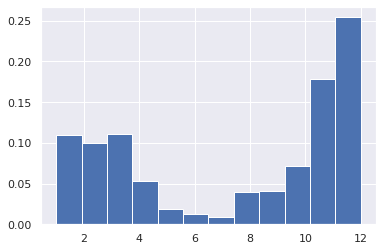

In [ ]:
# # Lets view accident per month for 2018
df_2018 = df[df["Start_Time"].dt.year==2018]
df_2018["Start_Time"].dt.month.hist(bins=12, weights=np.ones(len(df_2018)) / len(df_2018))
plt.show()

## **Temperature**

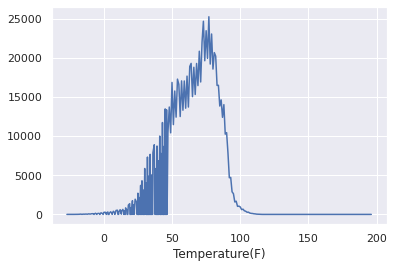

In [ ]:
import matplotlib.ticker as mtick
df.groupby("Temperature(F)")["ID"].count().plot()
plt.show()

In [ ]:
df["Temperature(F)"]

count    943318.000000
mean         63.833323
std          18.162256
min         -27.000000
25%          51.000000
50%          66.000000
75%          78.000000
max         196.000000
Name: Temperature(F), dtype: float64

## Latitude and Longtitude

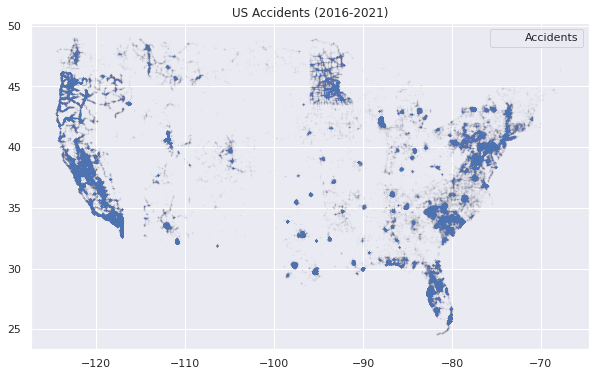

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df["Start_Lng"], df["Start_Lat"], alpha=0.01, s=.5, label="Accidents", cmap=plt.get_cmap("YlOrBr"))
plt.title("US Accidents (2016-2021)")
plt.legend()

In [21]:
# View heat map of accidents in Florida
df_fl = df[df["State"]=="FL"]

In [23]:
df_fl.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [29]:
lat, lon = df_fl["Start_Lat"].iloc[0], df_fl["Start_Lng"].iloc[0]
lat, lon

(26.73322700000001, -81.437699)

In [30]:
for x in df_fl[['Start_Lat', 'Start_Lng']].sample(100).iteritems():
    print(x[1])

2404592    28.610350
2008831    25.900196
815623     28.488834
510270     25.913275
1641374    30.474030
             ...    
1276392    28.185020
1601925    25.689889
491418     30.298123
800905     29.046236
512244     30.261435
Name: Start_Lat, Length: 100, dtype: float64
2404592   -81.284440
2008831   -80.162624
815623    -81.429064
510270    -80.122583
1641374   -87.225392
             ...    
1276392   -82.503479
1601925   -80.415799
491418    -86.058750
800905    -81.987210
512244    -81.627052
Name: Start_Lng, Length: 100, dtype: float64


In [32]:
lat_lng_pairs = list(zip(list(df_fl["Start_Lat"]), list(df_fl["Start_Lng"])))

In [38]:
import folium
from folium.plugins import HeatMap

In [40]:
map = folium.Map()
HeatMap(lat_lng_pairs).add_to(map)
map

## Conclusion and Insights From the Data

* Florida and California have the most accidents of all the states. 
45% of DataFrame
* A Higher percentage of accidents occur between 1pm to 6pm.
* The two cities (Miami & Orlando) with highest accidents are in the state of Florida
* Holiday season (December and November respectfively) are high accident months in the US